<h1 style='color: #00A78C; font-size: 34px; font-weight: bold;'>Análise de Qualidade de Frutas

</h1>


# <font color="#FFA17A" style="font-size: 30px;">Objetivo</font>
<hr style="border: 2px solid #FFA17A;">

 <p style='font-size: 23px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i><b>O objetivo deste projeto é realizar uma análise exploratória de dados em um conjunto de dados sobre frutas, identificando padrões e características que possam estar relacionadas à qualidade das frutas.</b></i>     
</p>

---

# <font color="#FFA17A" style="font-size: 30px;">Familiarização com o conjunto de dados</font>
<hr style="border: 2px solid #FFA17A;">

In [1]:
# IMPORTANMDO BIBLIOTECAS

import pandas as pd
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import plotly.graph_objects as go
import matplotlib.patches as mpatches
import plotly.express as px
import locale
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

In [55]:
# Criação do Dataframe

df = pd.read_csv("apple_quality.csv")
df.tail(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3991,3991.0,-4.007762,2.970164,0.218167,-0.492369,1.656375,-2.133895,-4.431320563,good
3992,3992.0,1.764253,-2.079695,-0.083383,-0.086724,-1.703385,3.840101,-0.338260538,good
3993,3993.0,1.520142,-0.352623,-3.206467,1.341719,0.675568,0.107093,-0.945080106,bad
3994,3994.0,1.482508,-2.581181,-0.306888,1.527877,1.056361,2.560829,-1.229254586,good
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [74]:
# Verificar a existencia de dados ausentes ou inconsistente

display(df[df.isnull().any(axis=1)])


# retirar valor nulo

df = df.drop(df[df.isnull().any(axis=1)].index)
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [75]:
# Verificando tipos das colunas

for coluna in df.columns:
    print(f"{coluna} __________ {df[coluna].apply(type).unique()}")

A_id __________ [<class 'float'>]
Size __________ [<class 'float'>]
Weight __________ [<class 'float'>]
Sweetness __________ [<class 'float'>]
Crunchiness __________ [<class 'float'>]
Juiciness __________ [<class 'float'>]
Ripeness __________ [<class 'float'>]
Acidity __________ [<class 'str'>]
Quality __________ [<class 'str'>]


In [76]:
df[df['Quality'].apply(lambda x: type(x) == float)]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality


In [82]:
# transformando coluna "Acidity" em float

df['Acidity'] = df['Acidity'].astype(float)

A_id __________ [<class 'float'>]
Size __________ [<class 'float'>]
Weight __________ [<class 'float'>]
Sweetness __________ [<class 'float'>]
Crunchiness __________ [<class 'float'>]
Juiciness __________ [<class 'float'>]
Ripeness __________ [<class 'float'>]
Acidity __________ [<class 'float'>]
Quality __________ [<class 'str'>]


# <font color="#FFA17A" style="font-size: 30px;">Compreensão estatística básica das variáveis</font>
<hr style="border: 2px solid #FFA17A;">

In [83]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


In [104]:
# Quantidade de dados
display(df.count()[0:2])

#média
display(df.iloc[:, 0:8].mean()[0:2])

#desvio padrão
display(df.iloc[:, 0:8].std()[0:2])

#mínimo
display(df.iloc[:, 0:8].min()[0:2])

#1º quartil
display(df.iloc[:, 0:8].quantile(0.25)[0:2])

#mediana
display(df.iloc[:, 0:8].median()[0:2])

#3º quartil
display(df.iloc[:, 0:8].quantile(0.75)[0:2])

# máximo
display(df.iloc[:, 0:8].max()[0:2])

A_id    4000
Size    4000
dtype: int64

A_id    1999.500000
Size      -0.503015
dtype: float64

A_id    1154.844867
Size       1.928059
dtype: float64

A_id    0.000000
Size   -7.151703
dtype: float64

A_id    999.750000
Size     -1.816765
Name: 0.25, dtype: float64

A_id    1999.500000
Size      -0.513703
dtype: float64

A_id    2999.250000
Size       0.805526
Name: 0.75, dtype: float64

A_id    3999.000000
Size       6.406367
dtype: float64

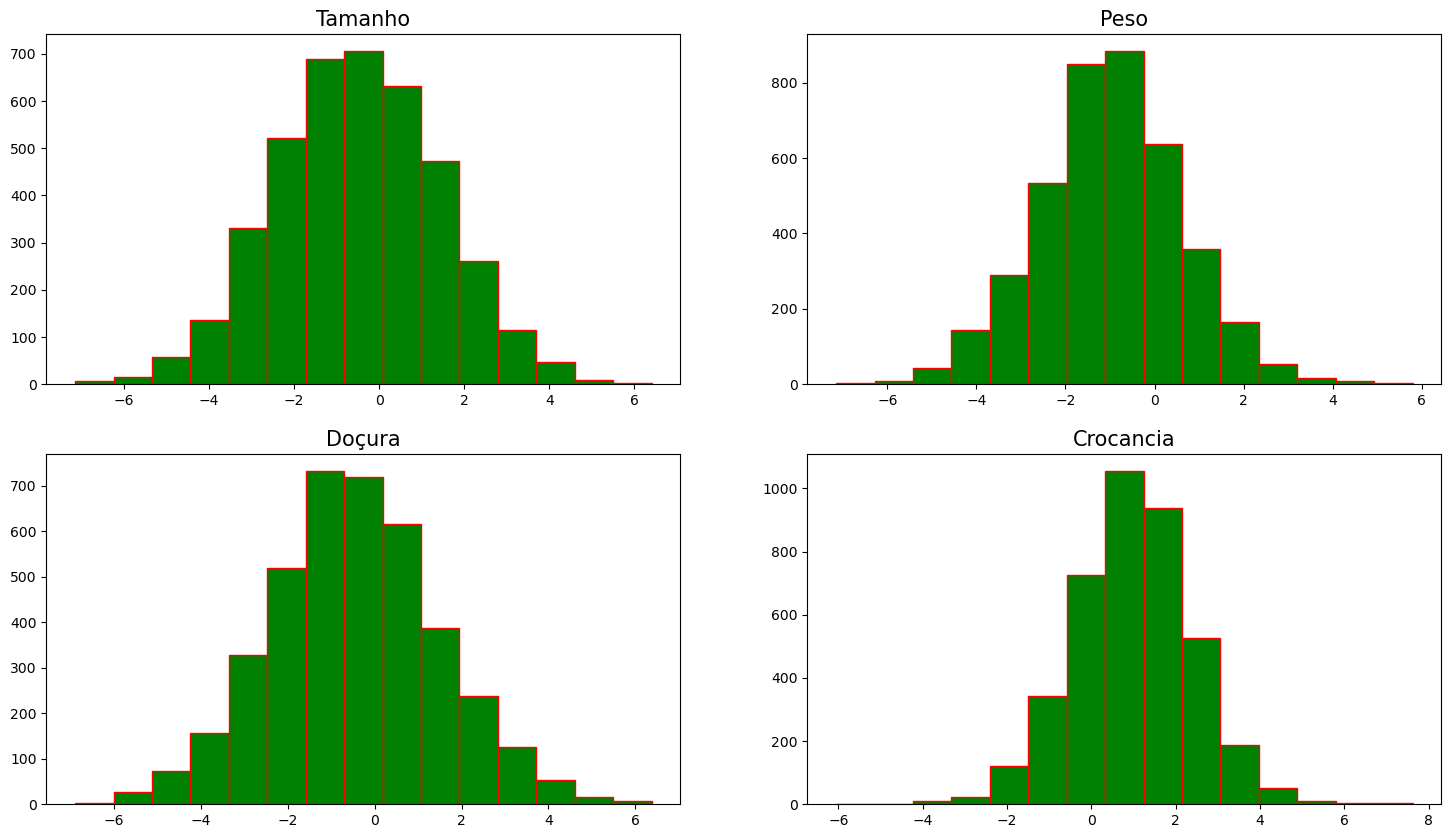

In [118]:
# Criando o histograma

fig, ax = plt.subplots(2, 2, figsize=(18,10))

ax[0][0].hist(df['Size'], bins=15, color='green', edgecolor='red')
ax[0][0].set_title('Tamanho', fontsize=15)

ax[0][1].hist(df['Weight'], bins=15, color='green', edgecolor='red')
ax[0][1].set_title('Peso', fontsize=15)

ax[1][0].hist(df['Sweetness'], bins=15, color='green', edgecolor='red')
ax[1][0].set_title('Doçura', fontsize=15)

ax[1][1].hist(df['Crunchiness'], bins=15, color='green', edgecolor='red')
ax[1][1].set_title('Crocancia', fontsize=15)

# Exibindo a figura
plt.show()

## Percebemos que todas as variáveis apresentam uma distribuição normal